# Linear Regression
Linear Regression, a very simple approach for supervised learning. In particular, linear regression is a useful tool for predicting a **quantitative** response.

It may seem somewhat dull(at first) compared to some of the more modern statistical learning approaches already discussed, linear regression is still a useful and widely used statistical learning method. Moreover, it serves as a good jumping-oﬀ point for newer approaches, many fancy statistical learning approaches can be seen as generalizations or extensions of linear regression.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.DataFrame({'Experience':[2,3,5,13,8,16,11,1,9], 
                   'Salary':[15,28,42,64,50,90,58,8,54]})
df

,Experience,Salary
0,2,15
1,3,28
2,5,42
3,13,64
4,8,50
5,16,90
6,11,58
7,1,8
8,9,54


Text(0.5, 1.0, 'Experience v/s Salary')

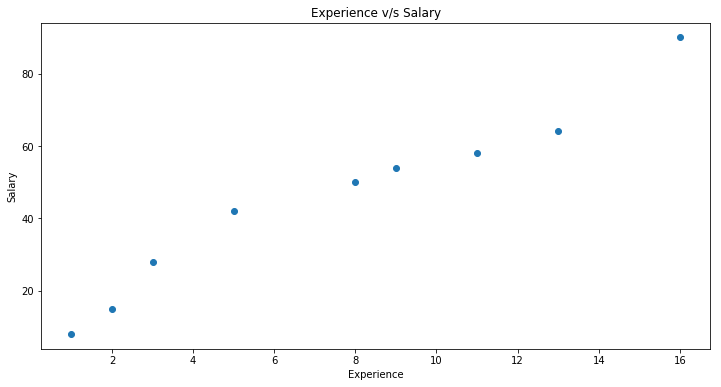

In [7]:
plt.figure(figsize=(12,6))
plt.scatter(df['Experience'], df['Salary'])
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Experience v/s Salary')

C:\Users\Computer World\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Computer World\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


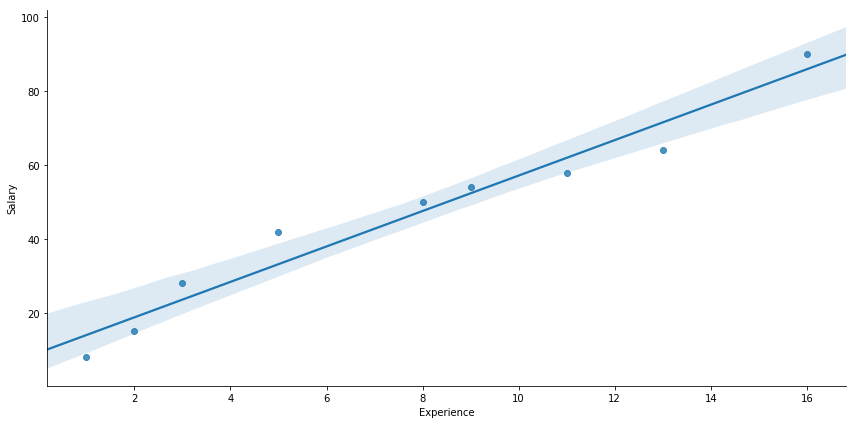

In [8]:
sns.lmplot(x='Experience', y='Salary', data=df, size=6, aspect=2)
# df_s = df.sort_values('Experience')
# plt.plot(df_s['Experience'], df_s['Salary'])

### What is 'Best Fit Line' ?
Not exactly passes through all the data points but instead tries it's best to approximate them.

### What is Regression ?
When your output is not a class label (like yes/no or spam/ham) neither is cluster (like c0, c1, etc.); but instead is a continuous value (like salary, height, etc.)

**Linear Regression** algorithm helps you to make this 'Best Fit Line' (by finding its equation).

### Remembered SVM ??
We drew a line separating the data points into two classes. To select the best line we use **margin** as the metric and then tried to **maximize** it.<br>
Here in Linear Regression, we will use **Sum of Square Error (SSE)** as the metric and try to **minimize** it to get the 'Best Fit Line'.

### SSE and why we want to minimize it ?
SSE is the square of the difference between the predicted value and True value (i.e Error).<br>
We tend to minimize the Error because this is how we define it.
<img src="images/sse.png" width=400 />

<img src="images/Screenshot_5.png" width=400 />

### How should we go about minimizing the error ?
Selecting a line which gives minimum value of SSE, which means finding values of **m** and **c** in the line equation which gives us minimum value of SSE.

![](images/sse_f.png)

To do the best fit of line intercept, we need to apply a linear regression model to reduce the SSE value as minimum as possible.

   
## Demo Time !!!

In [9]:
from sklearn.datasets import load_diabetes
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.metrics import mean_squared_error as mse

In [10]:
# Load the diabetes dataset
diabetes = load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# taking last 20 samples
diabetes_X_test = diabetes_X[-20:]
diabetes_y_test = diabetes.target[-20:]

# calculating min(), max()
dx_min, dx_max = diabetes_X_test.min(), diabetes_X_test.max()
dy_min, dy_max = diabetes_y_test.min(), diabetes_y_test.max()

# normalizing 
diabetes_X_test = (diabetes_X_test - dx_min)/(dx_max-dx_min)
diabetes_y_test = (diabetes_y_test - dy_min)/(dy_max-dy_min)

In [11]:
# plot linear regression
def plot_linearModel(m,c):
    y_pred = (m*diabetes_X_test)+c
    plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
    plt.plot(diabetes_X_test, y_pred, color='blue', linewidth=3)
    plt.xticks(())
    plt.yticks(())
    plt.xlim((0, 1.1))
    plt.ylim((0, 1.1))
    ys = np.array(list(zip(diabetes_y_test, y_pred))).reshape(-1)
    xs = np.repeat(diabetes_X_test, 2)
    for i in range(0, len(ys), 2):
        plt.plot(xs[i:i+2], ys[i:i+2], 'ro-')
    plt.show()
    print('Mean Square Error (MSE): {}'.format(mse(diabetes_y_test, y_pred)))

In [12]:
interact(plot_linearModel, m= (0.0,3.0), c= (-1.0,1.0));

interactive(children=(FloatSlider(value=1.5, description='m', max=3.0), FloatSlider(value=0.0, description='c'…

### Interpreting the coefficients

### Linear Regression in 3-Dimension
Now its no longer a line, instead is a hyper plane.

<img src="images/Screenshot_6.png" width=400 />

## Linear Regression (what? and for what?) 
The overall idea of regression is to examine two things: <br>
(1) does a set of predictor variables do a good job in predicting an outcome (dependent) variable? <br> 
(2) Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable?<br>
These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables.

### Uses:
Three major uses for regression analysis are <br>
(1) determining the strength of predictors, <br>
(2) forecasting an effect, and <br>
(3) trend forecasting.

**First**, the regression might be used to identify the strength of the effect that the independent variable(s) have on a dependent variable.  Typical questions are what is the strength of relationship between dose and effect, sales and marketing spending, or age and income.<br><br>
**Second**, it can be used to forecast effects or impact of changes.  That is, the regression analysis helps us to understand how much the dependent variable changes with a change in one or more independent variables.  A typical question is, “how much additional sales income do I get for each additional $1000 spent on marketing?”<br><br>
**Third**, regression analysis predicts trends and future values.  The regression analysis can be used to get point estimates.  A typical question is, “what will the price of gold be in 6 months?”<br><br>

### Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.
   


# Methods to find best fit line

### (a) Ordinary Least Square (OLS) Method

## In y= mx + b, 

![](images/ols_f.png)

where,
        bar(x) and bar(y) are average/mean value of x and y respectively. <br><br>
Ordinary Least Square method looks simple and computation is easy. But, this OLS method will only work for a univariate dataset which is single X variables and single Y variables. Multi-variate dataset contains a single Y variables set and multiple X variables sets, require us to use a machine learning algorithm called “Gradient Descent”.

### (b) Gradient Descent

Gradient descent algorithm’s main objective is to minimise the cost function. It is one of the best optimisation algorithms to minimise errors (difference of actual value and predicted value).

Let’s represent the hypothesis h, which is function or a learning algorithm.

![](images/Screenshot_7.png)

The goal is similar like the above operation that we did to find out a best fit of intercept line ‘y’ in the slope ‘m’. Using Gradient descent algorithm also, we will figure out a minimal cost function by applying various parameters for theta 0 and theta 1 and see the slope intercept until it reaches convergence.

In a real world example, it is similar to find out a best direction to take a step downhill.

![](images/gradientDescent.png)

We take a step towards the direction to get down. From the each step, you look out the direction again to get down faster and downhill quickly. The similar approach is using in this algorithm to minimise cost function.

We can measure the accuracy of our hypothesis function by using a cost function and the formula is

![](images/cost_f.png)

#### Gradient Descent for Linear Regression

![](images/Screenshot_1.png)

Why do we use partial derivative in the equation? Partial derivatives represents the rate of change of the functions as the variable change. In our case we change values for theta 0 and theta 1 and identifies the rate of change. To apply rate of change values for theta 0 and theta 1, the below are the equations for theta 0 and theta 1 to apply it on each epoch.

![](images/Screenshot_2.png)

To find the best minimum, repeat steps to apply various values for theta 0 and theta 1. In other words, repeat steps until convergence.

![](images/Screenshot_3.png)

   where alpha (a) is a learning rate / how big a step take to downhill.
    
![](images/Screenshot_4.png)


### Types of Gradient Descent Algorithms

There are three types of Gradient Descent Algorithms:

1. Batch Gradient Descent
2. Stochastic Gradient Descent
3. Mini-Batch Gradient Descent

#### Batch Gradient Descent

   In the batch gradient descent, to calculate the gradient of the cost function, we need to sum all training examples for each steps
   If we have 3 millions samples (m training examples) then the gradient descent algorithm should sum 3 millions samples for every epoch. To move a single step, we have to calculate each with 3 million times!
   Batch Gradient Descent is not good fit for large datasets

#### Stochastic Gradient Descent (SGD)

   In stochastic Gradient Descent, we use one example or one training sample at each iteration instead of using whole dataset to sum all for every steps
   SGD is widely used for larger dataset trainings and computationally faster and can be trained in parallel
   Need to randomly shuffle the training examples before calculating it

#### Mini-Batch Gradient Descent

   It is similar like SGD, it uses n samples instead of 1 at each iteration.


### Further Reading
   * [Model Evaluation regression metrics](http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) 
   * [Sklearn Linear models User Guide](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)
   * [blog on ridge and lasso Regression (Highly recommended)](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/)